<a href="https://colab.research.google.com/github/TAUforPython/BioMedAI/blob/main/ML%20TMS%20pain%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [65]:
link_url = 'https://raw.githubusercontent.com/TAUforPython/BioMedAI/refs/heads/main/test_datasets/tms_raw_data.csv'

raw_data = pd.read_csv(link_url, sep = ';')
raw_data.head(5)

,patient_id,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_dn4,score_paint_detect,score_beck,...,theshold_edge_right,theshold_edge_left,avg_avg_respone_right,avg_avg_respone_left,avg_interstimul_threshod,avg_inhibition_threshold_right,avg_inhibition_threshold_left,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,patient_ 1,0,72,1.0,324.0,9.0,58.0,5.0,24.0,24.0,...,61,58,"140,7675","178,1633333","3,277777778","-9,766666667","-8,877777778",NaN,NaN,NaN
1,patient_ 2,1,60,0.0,120.0,NaN,NaN,NaN,NaN,NaN,...,46,40,"73,48533333","51,33366667","3,277777778","15,47777778","17,92222222",NaN,NaN,NaN
2,patient_ 3,0,54,0.0,312.0,7.0,38.0,7.0,24.0,9.0,...,56,60,"145,275","189,0625","3,277777778","-1,233333333","0,67",NaN,NaN,NaN
3,patient_ 4,0,25,0.0,60.0,5.0,22.0,2.0,7.0,8.0,...,26,33,"66,66191667","88,53916667","3,277777778","4,466666667","11,26666667",NaN,NaN,NaN
4,patient_ 5,0,42,0.0,24.0,8.0,48.0,3.0,7.0,22.0,...,42,52,"59,29183333","59,76133333","3,277777778","3,833333333","11,46444444",NaN,NaN,NaN


In [67]:
raw_data.describe()

,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_dn4,score_paint_detect,score_beck,score_spilberg_person,...,therapy_blockade,threshold_left,threshold_right,interstimul_interval,interstimul_threshod,theshold_edge_right,theshold_edge_left,Unnamed: 49,Unnamed: 50,Unnamed: 51
count,45.000000,45.000000,32.000000,31.000000,28.000000,28.000000,26.000000,28.000000,26.000000,28.000000,...,29.000000,45.000000,45.000000,45.0,45.0,45.000000,45.000000,0.0,0.0,0.0
mean,0.311111,55.444444,0.312500,172.354839,6.071429,36.071429,3.230769,12.178571,13.153846,47.750000,...,0.517241,43.822222,42.288889,2.0,1.0,45.000000,45.022222,NaN,NaN,NaN
std,0.468179,18.595644,0.470929,137.450730,1.998677,16.388633,1.945409,7.231892,6.914867,9.078363,...,0.508548,9.271876,8.638240,0.0,0.0,9.922426,9.049081,NaN,NaN,NaN
min,0.000000,20.000000,0.000000,3.000000,2.000000,10.000000,0.000000,0.000000,2.000000,27.000000,...,0.000000,25.000000,26.000000,2.0,1.0,26.000000,27.000000,NaN,NaN,NaN
25%,0.000000,43.000000,0.000000,78.000000,4.750000,26.500000,2.000000,6.750000,8.250000,42.750000,...,0.000000,38.000000,37.000000,2.0,1.0,39.000000,39.000000,NaN,NaN,NaN
50%,0.000000,59.000000,0.000000,120.000000,6.000000,35.000000,3.000000,11.500000,13.000000,49.000000,...,1.000000,41.000000,41.000000,2.0,1.0,43.000000,43.000000,NaN,NaN,NaN
75%,1.000000,66.000000,1.000000,240.000000,8.000000,48.000000,5.000000,17.000000,18.000000,54.250000,...,1.000000,51.000000,46.000000,2.0,1.0,50.000000,52.000000,NaN,NaN,NaN
max,1.000000,125.000000,1.000000,540.000000,10.000000,72.000000,7.000000,25.000000,27.000000,64.000000,...,1.000000,62.000000,63.000000,2.0,1.0,76.000000,62.000000,NaN,NaN,NaN


In [68]:
raw_data = raw_data.drop(['Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51','interstimul_interval','interstimul_threshod'], axis=1)
raw_data['age'].values[35] = 55
raw_data['age'].values[35]


np.int64(55)

In [69]:
raw_data.head(5)

,patient_id,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_dn4,score_paint_detect,score_beck,...,avg_respone_left,inhibition_threshold_right,inhibition_threshold_left,theshold_edge_right,theshold_edge_left,avg_avg_respone_right,avg_avg_respone_left,avg_interstimul_threshod,avg_inhibition_threshold_right,avg_inhibition_threshold_left
0,patient_ 1,0,72,1.0,324.0,9.0,58.0,5.0,24.0,24.0,...,"35,95","-0,6","-7,8",61,58,"140,7675","178,1633333","3,277777778","-9,766666667","-8,877777778"
1,patient_ 2,1,60,0.0,120.0,NaN,NaN,NaN,NaN,NaN,...,"4,966","17,2","21,2",46,40,"73,48533333","51,33366667","3,277777778","15,47777778","17,92222222"
2,patient_ 3,0,54,0.0,312.0,7.0,38.0,7.0,24.0,9.0,...,"78,74","4,3","1,2",56,60,"145,275","189,0625","3,277777778","-1,233333333","0,67"
3,patient_ 4,0,25,0.0,60.0,5.0,22.0,2.0,7.0,8.0,...,"60,34","6,2","23,8",26,33,"66,66191667","88,53916667","3,277777778","4,466666667","11,26666667"
4,patient_ 5,0,42,0.0,24.0,8.0,48.0,3.0,7.0,22.0,...,"7,568","4,7","-0,26",42,52,"59,29183333","59,76133333","3,277777778","3,833333333","11,46444444"


In [70]:
raw_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
sex,45.0,0.31,0.47,0.0,0.00,0.0,1.00,1.0
age,45.0,53.89,15.28,20.0,43.00,57.0,66.00,78.0
pain_type,32.0,0.31,0.47,0.0,0.00,0.0,1.00,1.0
illnes_month,31.0,172.35,137.45,3.0,78.00,120.0,240.00,540.0
score_pain_reiting,28.0,6.07,2.00,2.0,4.75,6.0,8.00,10.0
score_osvestri,28.0,36.07,16.39,10.0,26.50,35.0,48.00,72.0
score_dn4,26.0,3.23,1.95,0.0,2.00,3.0,5.00,7.0
score_paint_detect,28.0,12.18,7.23,0.0,6.75,11.5,17.00,25.0
score_beck,26.0,13.15,6.91,2.0,8.25,13.0,18.00,27.0
score_spilberg_person,28.0,47.75,9.08,27.0,42.75,49.0,54.25,64.0


# Short review of three subset

In [71]:
table_data = raw_data
table_data.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_dn4',
       'score_paint_detect', 'score_beck', 'score_spilberg_person',
       'score_spilberg_anxiety', 'score_pittsburg', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'score_mak_gill', 'nsaid_drug',
       'miorelax_drug', 'antidepress_drug', 'anticonv_drug',
       'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade',
       'threshold_left', 'threshold_right', 'motor_evoked_right',
       'motor_evoked_left', 'avg_respone_right', 'avg_respone_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right', 'theshold_edge_left', 'avg_avg_respone_right',
       'avg_avg_respone_left', 'avg_interstimul_threshod',
       'avg_inhibition_threshold_right', 'avg_inhibition_th

In [73]:
subset_patient_columns = [
    'patient_id', 'sex', 'age', 'pain_type', 'illnes_month'
    ]

subset_score_columns = [
    'patient_id',
    'score_pain_reiting', 'score_osvestri', 'score_dn4',
    'score_paint_detect', 'score_beck', 'score_spilberg_person',
    'score_spilberg_anxiety', 'score_pittsburg', 'score_csi','score_mak_gill'
    ]

subset_dignosis_columns = [
    'patient_id',
    'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
    'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
    'panic_attack', 'depression', 'nsaid_drug',
    'miorelax_drug', 'antidepress_drug', 'anticonv_drug',
    'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade'
    ]

subset_tms_columns = [
    'patient_id',
    'threshold_left', 'threshold_right', 'motor_evoked_right', 'motor_evoked_left',
    'avg_respone_right', 'avg_respone_left',
    'inhibition_threshold_right', 'inhibition_threshold_left',
    'theshold_edge_right', 'theshold_edge_left',
    'avg_avg_respone_right', 'avg_avg_respone_left',
    'avg_inhibition_threshold_right', 'avg_inhibition_threshold_left'
    ]

# Helicopter view
Perform a comprehensive exploratory data analysis and visualization on the `table_data` DataFrame, loaded from 'https://raw.githubusercontent.com/TAUforPython/BioMedAI/refs/heads/main/test_datasets/tms_raw_data.csv'. This analysis will include: data cleaning (dropping unnecessary columns, correcting the 'age' value, converting appropriate columns to numeric types handling comma decimal separators, and imputing missing values with the mean); visualizing patient demographics and basic information through histograms for 'age' and 'illnes_month', and countplots for 'sex' and 'pain_type'; generating a correlation heatmap for patient score metrics; creating countplots to show diagnosis and treatment prevalence; and finally, visualizing the relationships between Transcranial Magnetic Stimulation (TMS) measurements with another correlation heatmap.

## Stat analysis

In [ ]:
table_data = raw_data

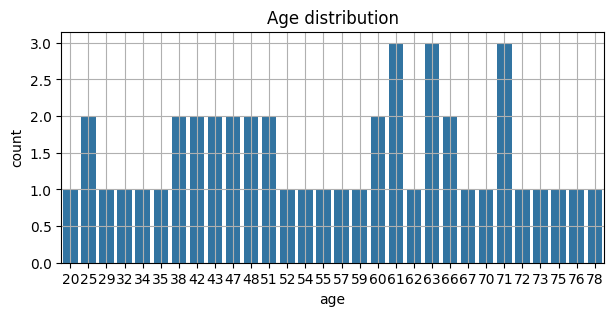

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(data=table_data, x='age')
plt.title('Age distribution')
plt.grid()
plt.show()

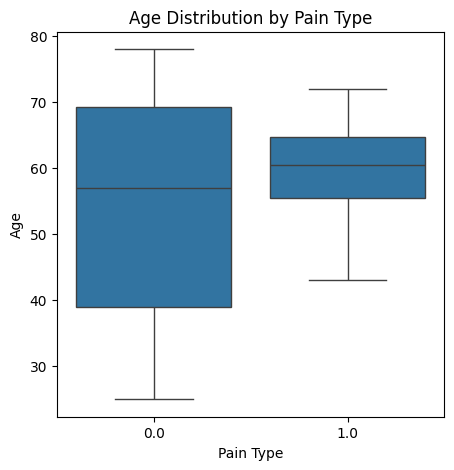

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=table_data, x='pain_type', y='age')
plt.title('Age Distribution by Pain Type')
plt.xlabel('Pain Type')
plt.ylabel('Age')
plt.show()

In [74]:
for col in table_data.columns:
    if col != 'patient_id': # Exclude 'patient_id' from conversion
        # Ensure the column is treated as string before replacement to avoid errors on mixed types
        table_data[col] = table_data[col].astype(str).str.replace(',', '.', regex=False)
        # Convert to numeric, coercing errors to NaN
        table_data[col] = pd.to_numeric(table_data[col], errors='coerce')

        # Impute missing values with the mean if any NaNs are present after conversion
        #if table_data[col].isnull().any():
        #    table_data[col] = table_data[col].fillna(table_data[col].mean())

print("table_data DataFrame has been cleaned: columns converted to numeric, comma decimals handled, and missing values imputed with the mean.")
print(table_data.head())

table_data DataFrame has been cleaned: columns converted to numeric, comma decimals handled, and missing values imputed with the mean.
   patient_id  sex  age  pain_type  illnes_month  score_pain_reiting  \
0  patient_ 1    0   72        1.0         324.0                 9.0   
1  patient_ 2    1   60        0.0         120.0                 NaN   
2  patient_ 3    0   54        0.0         312.0                 7.0   
3  patient_ 4    0   25        0.0          60.0                 5.0   
4  patient_ 5    0   42        0.0          24.0                 8.0   

   score_osvestri  score_dn4  score_paint_detect  score_beck  ...  \
0            58.0        5.0                24.0        24.0  ...   
1             NaN        NaN                 NaN         NaN  ...   
2            38.0        7.0                24.0         9.0  ...   
3            22.0        2.0                 7.0         8.0  ...   
4            48.0        3.0                 7.0        22.0  ...   

   avg_respone_le

## Visualize Patient Demographics and Basic Information

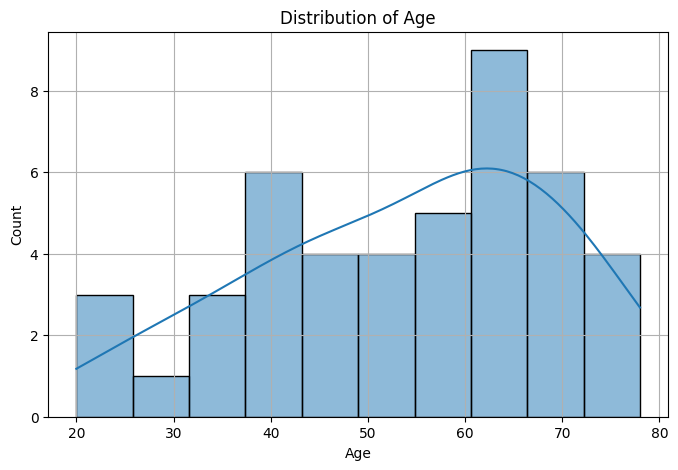

In [76]:
plt.figure(figsize=(8, 5))
sns.histplot(data=table_data, x='age', kde=True, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

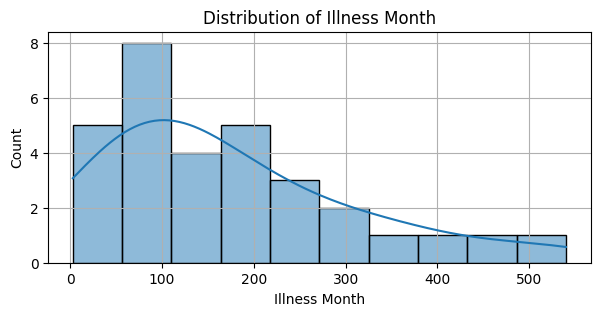

In [77]:
plt.figure(figsize=(7, 3))
sns.histplot(data=table_data, x='illnes_month', kde=True, bins=10)
plt.title('Distribution of Illness Month')
plt.xlabel('Illness Month')
plt.ylabel('Count')
plt.grid(True)
plt.show()

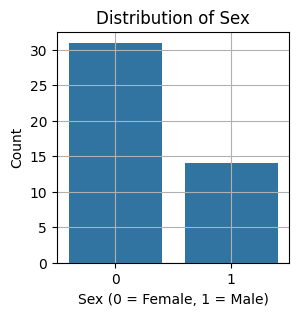

In [78]:
plt.figure(figsize=(3, 3))
sns.countplot(data=table_data, x='sex')
plt.title('Distribution of Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

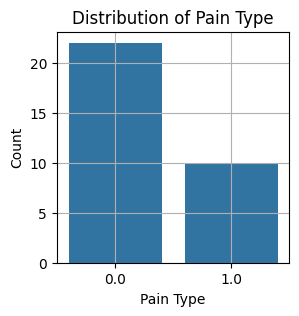

In [89]:
plt.figure(figsize=(3, 3))
sns.countplot(data=table_data[['patient_id','pain_type']].dropna(), x='pain_type')
plt.title('Distribution of Pain Type')
plt.xlabel('Pain Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Visualize Patient Scores Correlation Heatmap

### Subtask:
Generate a correlation heatmap for the 'subset_score_columns' (excluding 'patient_id'). This will display the Pearson correlation coefficients between the various patient score metrics, highlighting their interrelationships.


**Reasoning**:
First, I will select the columns specified in `subset_score_columns` from the `table_data` DataFrame, excluding 'patient_id', to create a new DataFrame `score_data`. This prepares the data specifically for correlation analysis of patient scores.



In [90]:
score_data = table_data[subset_score_columns].drop('patient_id', axis=1)

print("Score data prepared for correlation analysis.")
print(score_data.head())

Score data prepared for correlation analysis.
   score_pain_reiting  score_osvestri  score_dn4  score_paint_detect  \
0                 9.0            58.0        5.0                24.0   
1                 NaN             NaN        NaN                 NaN   
2                 7.0            38.0        7.0                24.0   
3                 5.0            22.0        2.0                 7.0   
4                 8.0            48.0        3.0                 7.0   

   score_beck  score_spilberg_person  score_spilberg_anxiety  score_pittsburg  \
0        24.0                   64.0                    56.0             27.0   
1         NaN                    NaN                     NaN              NaN   
2         9.0                   45.0                    32.0             44.0   
3         8.0                   43.0                    42.0             17.0   
4        22.0                   50.0                    39.0             40.0   

   score_csi  score_mak_gill  
0  

**Reasoning**:
To visualize the interrelationships between patient score metrics, I will calculate the Pearson correlation matrix for `score_data` and then create a heatmap to display these correlations, annotating it with the correlation values and adding a descriptive title.



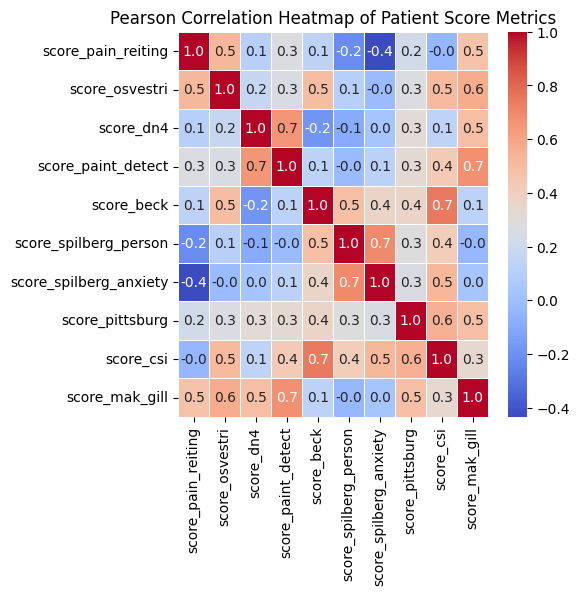

Correlation heatmap of patient score metrics generated.


In [93]:
correlation_matrix_scores = score_data.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix_scores, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Pearson Correlation Heatmap of Patient Score Metrics')
plt.show()

print("Correlation heatmap of patient score metrics generated.")

## Visualize Diagnosis and Treatment Prevalence


In [99]:
diagnosis_data = table_data[subset_dignosis_columns].drop('patient_id', axis=1)
diagnosis_data = diagnosis_data.drop('tmdibular_pathology', axis=1)

print("Diagnosis data prepared for visualization.")
print(diagnosis_data.head())

Diagnosis data prepared for visualization.
   restless_legs  fatigue  fibrimyalgia  migraine  bowel_irritable   \
0            1.0      1.0           0.0       0.0               0.0   
1            NaN      NaN           NaN       NaN               NaN   
2            NaN      NaN           NaN       NaN               NaN   
3            0.0      0.0           0.0       0.0               0.0   
4            NaN      NaN           NaN       NaN               NaN   

   chemy_sensitive  neck_injuries  panic_attack  depression  nsaid_drug  \
0              0.0            0.0           0.0         0.0         1.0   
1              NaN            NaN           NaN         NaN         NaN   
2              NaN            NaN           NaN         NaN         1.0   
3              0.0            1.0           0.0         0.0         1.0   
4              NaN            NaN           NaN         NaN         1.0   

   miorelax_drug  antidepress_drug  anticonv_drug  radio_freq_denerv  \
0      

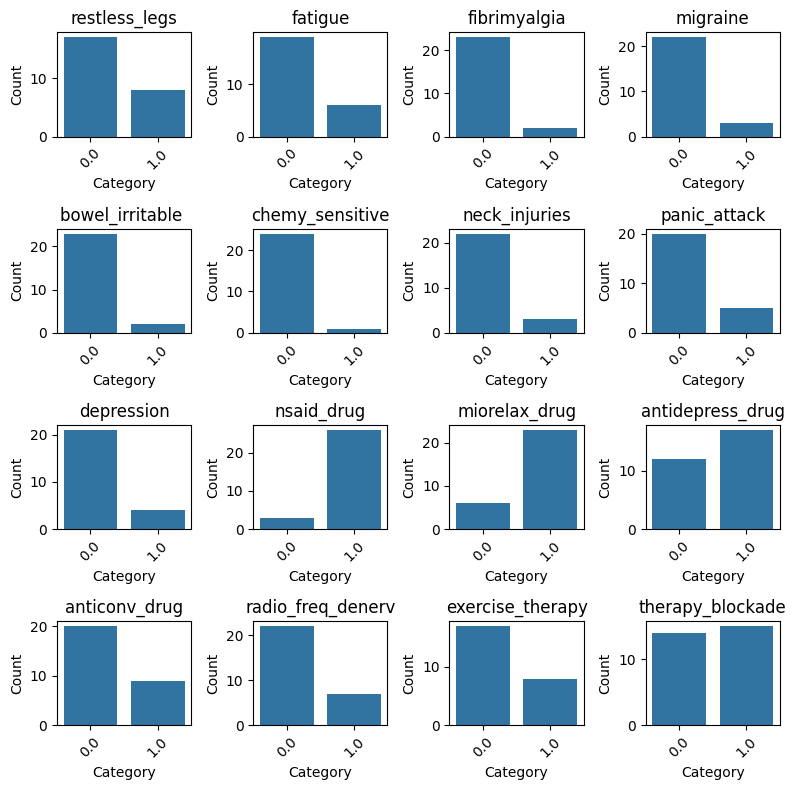

Countplots for diagnosis and treatment features generated.


In [107]:
import math

num_features = diagnosis_data.shape[1]
ncols = 4
nrows = math.ceil(num_features / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2 * ncols, 2 * nrows))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(diagnosis_data.columns):
    sns.countplot(data=diagnosis_data, x=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Countplots for diagnosis and treatment features generated.")

#Case 1: Linear Regression model

In [108]:
table_data.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_dn4',
       'score_paint_detect', 'score_beck', 'score_spilberg_person',
       'score_spilberg_anxiety', 'score_pittsburg', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'score_mak_gill', 'nsaid_drug',
       'miorelax_drug', 'antidepress_drug', 'anticonv_drug',
       'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade',
       'threshold_left', 'threshold_right', 'motor_evoked_right',
       'motor_evoked_left', 'avg_respone_right', 'avg_respone_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right', 'theshold_edge_left', 'avg_avg_respone_right',
       'avg_avg_respone_left', 'avg_interstimul_threshod',
       'avg_inhibition_threshold_right', 'avg_inhibition_th

In [136]:
#LPRM linear probabolity Regression Model

# it's a target for LPRM
#'avg_inhibition_threshold_right', 'avg_inhibition_threshold_left'
# 'avg_avg_respone_right','avg_avg_respone_left'
table_data_LPRM_columns = [
       'patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_dn4',
       'score_paint_detect', 'score_beck', 'score_spilberg_person',
       'score_spilberg_anxiety', 'score_pittsburg', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'score_mak_gill', 'nsaid_drug',
       'miorelax_drug', 'antidepress_drug', 'anticonv_drug',
       'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade',
       'threshold_left', 'threshold_right', 'motor_evoked_right', 'motor_evoked_left',
       'avg_respone_right', 'avg_respone_left',
       'theshold_edge_right', 'theshold_edge_left',
       'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_inhibition_threshold_right', 'avg_inhibition_threshold_left'

]

table_data_LPRM = table_data[table_data_LPRM_columns]

In [116]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col, summary_params
from scipy.stats import f
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.iolib.summary2 import summary_col, summary_params

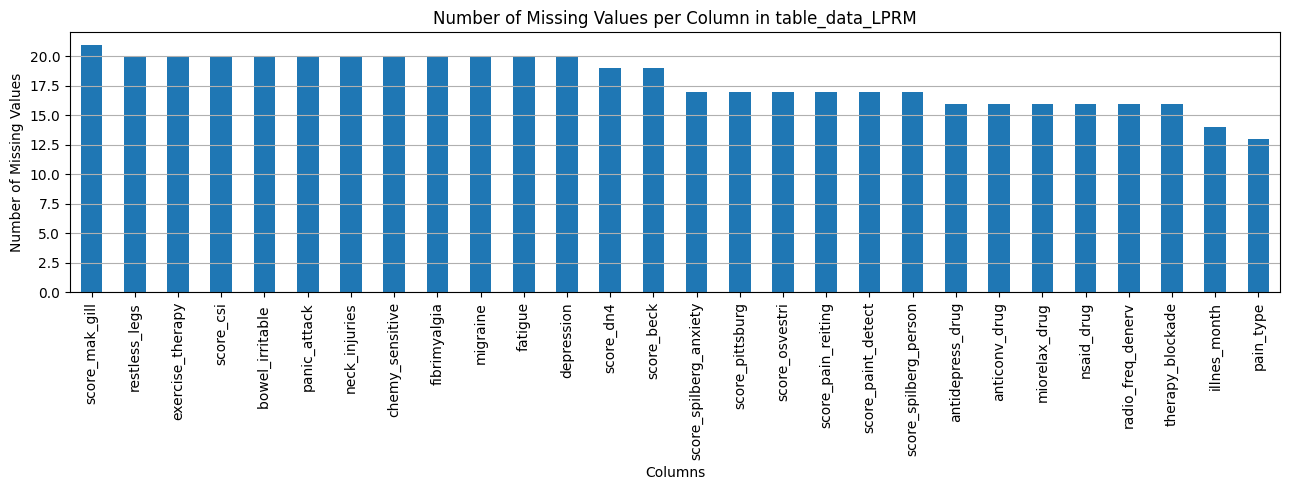

In [137]:
# число пропусков по каждой переменной
missing_values = table_data_LPRM.isna().sum()

# Filter out columns with no missing values for better visualization
missing_values = missing_values[missing_values > 0]

# Plotting the missing values
plt.figure(figsize=(13, 5))
missing_values.sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Missing Values per Column in table_data_LPRM')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## strategy 1: drop all NaN

In [138]:
table_data_LPRM = table_data[table_data_LPRM_columns]
table_data_LPRM = table_data_LPRM.dropna()
#сбросим индекс DataFrame после удаления строк со значениями NaN
table_data_LPRM = table_data_LPRM.reset_index(drop=True)
table_data_LPRM.shape

(17, 43)

In [139]:
# Convert relevant columns to numeric, handling comma decimal separators
for col in table_data_LPRM.columns:
    if col != 'patient_id': # Exclude 'patient_id' from conversion
        # Ensure the column is treated as string before replacement to avoid errors on mixed types
        table_data_LPRM[col] = table_data_LPRM[col].astype(str).str.replace(',', '.', regex=False)
        # Convert to numeric, coercing errors to NaN
        table_data_LPRM[col] = pd.to_numeric(table_data_LPRM[col], errors='coerce')

y = table_data_LPRM['avg_avg_respone_right'] # dependent variable

# Drop 'patient_id' and the dependent variable from the regressors
X_cols_to_drop = ['patient_id', 'avg_avg_respone_right']
X = add_constant(table_data_LPRM.drop(columns=X_cols_to_drop, errors='ignore')) # regressors with added constant column

# Define model specification using regression design matrices
mod_lpm = sm.OLS(endog=y, exog=X)
# Fit the model with heteroskedasticity correction
res_lpm_hc = mod_lpm.fit(cov_type='HC3')
# Report summary
res_lpm_ols = mod_lpm.fit(cov_type='nonrobust')
#print(summary_col([res_lpm_hc, res_lpm_ols], model_names=['Robust', 'Non-robust'], stars=True))
print(res_lpm_hc.summary(slim=True))


                              OLS Regression Results                             
Dep. Variable:     avg_avg_respone_right   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                    nan
No. Observations:                     17   F-statistic:                     7.426
Covariance Type:                     HC3   Prob (F-statistic):                nan
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0462      1.507      0.031      0.976      -2.907       2.999
sex                               -0.1123      1.404     -0.080      0.936      -2.864       2.640
age                                0.4213      5.046      0.083      0.933      -9.469      10.312
pain_type                          0.2130      3.582      0.059      0.953      -6.807       7.

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 41, but rank is 17
  warnings.warn('covariance of constraints does not have full '


In [157]:
df = table_data_LPRM[table_data_LPRM['patient_id'] != 'patient_34']
df = df.reset_index(drop=True)
table_data_LPRM = df
print(f"Row for patient_34 dropped. New shape: {table_data_LPRM.shape}")

Row for patient_34 dropped. New shape: (17, 43)


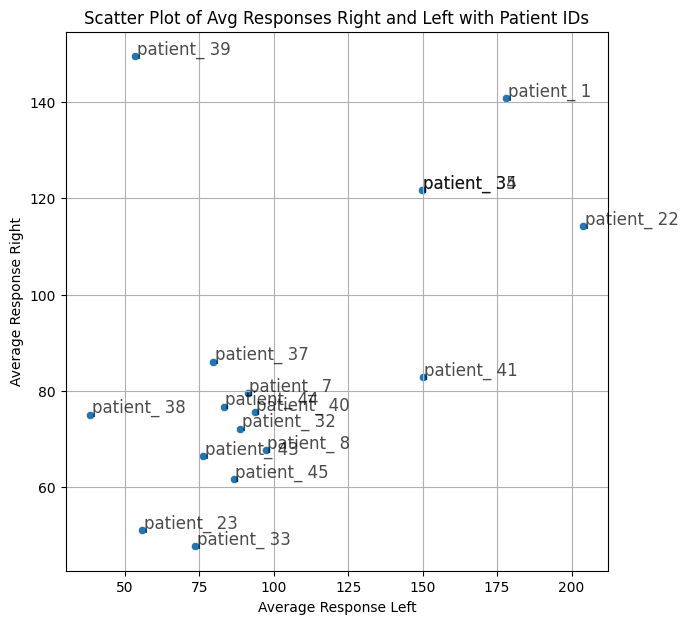

In [159]:
#table_data_LPRM has a 34 and 35 patient the same. Drop it

plt.figure(figsize=(7, 7))
sns.scatterplot(data=table_data_LPRM, x='avg_avg_respone_left', y='avg_avg_respone_right')

# Add labels for patient_id
for i, row in table_data_LPRM.iterrows():
    plt.text(row['avg_avg_respone_left'] + 0.5, row['avg_avg_respone_right'] + 0.5,
             row['patient_id'], fontsize=12, alpha=0.7)

plt.title('Scatter Plot of Avg Responses Right and Left with Patient IDs')
plt.xlabel('Average Response Left')
plt.ylabel('Average Response Right')
plt.grid(True)
plt.show()

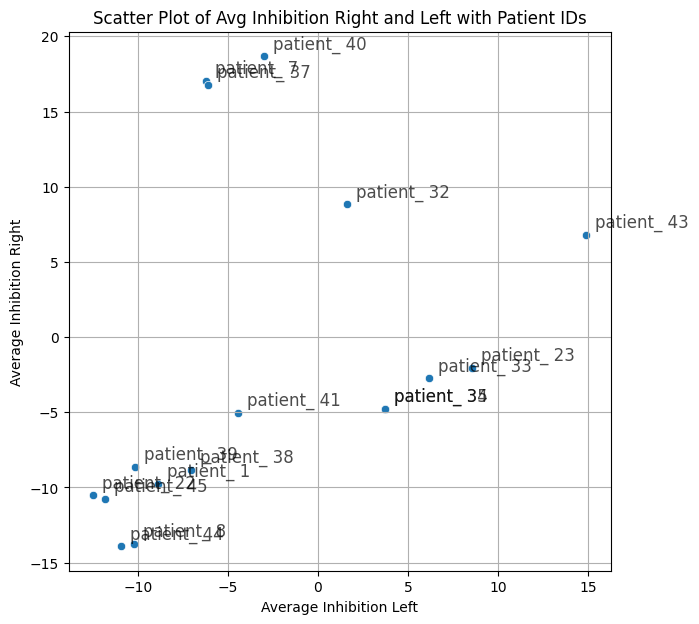

In [ ]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=table_data_LPRM, x='avg_inhibition_threshold_left', y='avg_inhibition_threshold_right')

# Add labels for patient_id
for i, row in table_data_LPRM.iterrows():
    plt.text(row['avg_inhibition_threshold_left'] + 0.5, row['avg_inhibition_threshold_right'] + 0.5,
             row['patient_id'], fontsize=12, alpha=0.7)

plt.title('Scatter Plot of Avg Inhibition Right and Left with Patient IDs')
plt.xlabel('Average Inhibition Left')
plt.ylabel('Average Inhibition Right')
plt.grid(True)
plt.show()

## Strategy 2: Try to find regression over TMS stiumulus

In [160]:
table_data_LPRM = table_data[table_data_LPRM_columns]
table_data_LPRM = table_data_LPRM.dropna()
#сбросим индекс DataFrame после удаления строк со значениями NaN
table_data_LPRM = table_data_LPRM.reset_index(drop=True)

# Convert relevant columns to numeric, handling comma decimal separators
for col in table_data_LPRM.columns:
    if col != 'patient_id': # Exclude 'patient_id' from conversion
        # Ensure the column is treated as string before replacement to avoid errors on mixed types
        table_data_LPRM[col] = table_data_LPRM[col].astype(str).str.replace(',', '.', regex=False)
        # Convert to numeric, coercing errors to NaN
        table_data_LPRM[col] = pd.to_numeric(table_data_LPRM[col], errors='coerce')

In [161]:
table_data_LPRM.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_dn4',
       'score_paint_detect', 'score_beck', 'score_spilberg_person',
       'score_spilberg_anxiety', 'score_pittsburg', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'migraine',
       'bowel_irritable ', 'chemy_sensitive', 'neck_injuries', 'panic_attack',
       'depression', 'score_mak_gill', 'nsaid_drug', 'miorelax_drug',
       'antidepress_drug', 'anticonv_drug', 'radio_freq_denerv',
       'exercise_therapy', 'therapy_blockade', 'threshold_left',
       'threshold_right', 'motor_evoked_right', 'motor_evoked_left',
       'avg_respone_right', 'avg_respone_left', 'theshold_edge_right',
       'theshold_edge_left', 'avg_avg_respone_right', 'avg_avg_respone_left',
       'avg_inhibition_threshold_right', 'avg_inhibition_threshold_left'],
      dtype='object')

In [162]:
table_data_LPRM_TMS_stimul_columns = [
       'threshold_left', 'threshold_right', 'motor_evoked_right',
       'motor_evoked_left', 'avg_respone_right', 'avg_respone_left',
       'theshold_edge_right', 'theshold_edge_left', 'avg_avg_respone_right',
       'avg_avg_respone_left', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left'
       ]

In [163]:
table_data_LPRM_TMS_stimul = table_data_LPRM[table_data_LPRM_TMS_stimul_columns]

In [164]:
y = table_data_LPRM_TMS_stimul['avg_avg_respone_right'] # dependent variable

# Drop 'patient_id' and the dependent variable from the regressors
X_cols_to_drop = ['avg_avg_respone_right']
X = add_constant(table_data_LPRM_TMS_stimul.drop(columns=X_cols_to_drop, errors='ignore')) # regressors with added constant column

# Define model specification using regression design matrices
mod_lpm = sm.OLS(endog=y, exog=X)
# Fit the model with heteroskedasticity correction
res_lpm_hc = mod_lpm.fit(cov_type='HC3')
# Report summary
res_lpm_ols = mod_lpm.fit(cov_type='nonrobust')
#print(summary_col([res_lpm_hc, res_lpm_ols], model_names=['Robust', 'Non-robust'], stars=True))
print(res_lpm_hc.summary(slim=True))

                              OLS Regression Results                             
Dep. Variable:     avg_avg_respone_right   R-squared:                       0.968
Model:                               OLS   Adj. R-squared:                  0.896
No. Observations:                     17   F-statistic:                     8.839
Covariance Type:                     HC3   Prob (F-statistic):             0.0131
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             82.0082    141.202      0.581      0.561    -194.742     358.758
threshold_left                    -0.1074      3.199     -0.034      0.973      -6.378       6.163
threshold_right                    0.2938      2.470      0.119      0.905      -4.548       5.136
motor_evoked_right                -0.8472     22.122     -0.038      0.969     -44.205      42.

In [167]:
# f-test и P-value
np.round(res_lpm_hc.fvalue, 3), np.round(res_lpm_hc.f_pvalue, 3)


(np.float64(8.839), np.float64(0.013))

In [168]:
alpha = 0.05
f.ppf(q=1-0.1, dfn=res_lpm_hc.df_model, dfd=res_lpm_hc.df_resid).round(3)

np.float64(3.282)

Hypothesys: regression is valid.
f_test = 8.839
f_critical = 3.282
f_test > f_critical  -> Hypothesis rejected!

In [169]:
y = table_data_LPRM_TMS_stimul['avg_avg_respone_left'] # dependent variable

# Drop 'patient_id' and the dependent variable from the regressors
X_cols_to_drop = ['avg_avg_respone_left']
X = add_constant(table_data_LPRM_TMS_stimul.drop(columns=X_cols_to_drop, errors='ignore')) # regressors with added constant column

# Define model specification using regression design matrices
mod_lpm = sm.OLS(endog=y, exog=X)
# Fit the model with heteroskedasticity correction
res_lpm_hc = mod_lpm.fit(cov_type='HC3')
# Report summary
res_lpm_ols = mod_lpm.fit(cov_type='nonrobust')
#print(summary_col([res_lpm_hc, res_lpm_ols], model_names=['Robust', 'Non-robust'], stars=True))
print(res_lpm_hc.summary(slim=True))

                             OLS Regression Results                             
Dep. Variable:     avg_avg_respone_left   R-squared:                       0.879
Model:                              OLS   Adj. R-squared:                  0.612
No. Observations:                    17   F-statistic:                     3.732
Covariance Type:                    HC3   Prob (F-statistic):             0.0787
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             16.6177    456.245      0.036      0.971    -877.606     910.841
threshold_left                     0.0954      9.447      0.010      0.992     -18.420      18.610
threshold_right                    0.2845      6.528      0.044      0.965     -12.510      13.079
motor_evoked_right                 0.1686     70.931      0.002      0.998    -138.854     139.192
m

In [170]:
np.round(res_lpm_hc.fvalue, 3), np.round(res_lpm_hc.f_pvalue, 3)

(np.float64(3.732), np.float64(0.079))

In [171]:
alpha = 0.05
f.ppf(q=1-0.1, dfn=res_lpm_hc.df_model, dfd=res_lpm_hc.df_resid).round(3)


np.float64(3.282)

Hypothesys: regression is valid.
f_test = 3.732
f_critical = 3.282
f_test > f_critical  -> Hypothesis rejected!

In [173]:
table_data_LPRM_TMS_stimul.columns

Index(['threshold_left', 'threshold_right', 'motor_evoked_right',
       'motor_evoked_left', 'avg_respone_right', 'avg_respone_left',
       'theshold_edge_right', 'theshold_edge_left', 'avg_avg_respone_right',
       'avg_avg_respone_left', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left'],
      dtype='object')

In [174]:
y = table_data_LPRM_TMS_stimul['avg_inhibition_threshold_right'] # dependent variable

# Drop 'patient_id' and the dependent variable from the regressors
X_cols_to_drop = ['avg_inhibition_threshold_right']
X = add_constant(table_data_LPRM_TMS_stimul.drop(columns=X_cols_to_drop, errors='ignore')) # regressors with added constant column

# Define model specification using regression design matrices
mod_lpm = sm.OLS(endog=y, exog=X)
# Fit the model with heteroskedasticity correction
res_lpm_hc = mod_lpm.fit(cov_type='HC3')
# Report summary
res_lpm_ols = mod_lpm.fit(cov_type='nonrobust')
#print(summary_col([res_lpm_hc, res_lpm_ols], model_names=['Robust', 'Non-robust'], stars=True))
print(res_lpm_hc.summary(slim=True))

                                  OLS Regression Results                                  
Dep. Variable:     avg_inhibition_threshold_right   R-squared:                       0.741
Model:                                        OLS   Adj. R-squared:                  0.172
No. Observations:                              17   F-statistic:                    0.3538
Covariance Type:                              HC3   Prob (F-statistic):              0.930
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -49.4515    139.048     -0.356      0.722    -321.981     223.078
threshold_left                    0.0586      3.519      0.017      0.987      -6.839       6.956
threshold_right                  -0.1647      2.664     -0.062      0.951      -5.387       5.057
motor_evoked_right                1.3497     26.443    

In [175]:
np.round(res_lpm_hc.fvalue, 3), np.round(res_lpm_hc.f_pvalue, 3)

(np.float64(0.354), np.float64(0.93))

In [176]:
alpha = 0.05
f.ppf(q=1-0.1, dfn=res_lpm_hc.df_model, dfd=res_lpm_hc.df_resid).round(3)

np.float64(3.282)

In [177]:
y = table_data_LPRM_TMS_stimul['avg_inhibition_threshold_left'] # dependent variable

# Drop 'patient_id' and the dependent variable from the regressors
X_cols_to_drop = ['avg_inhibition_threshold_left']
X = add_constant(table_data_LPRM_TMS_stimul.drop(columns=X_cols_to_drop, errors='ignore')) # regressors with added constant column

# Define model specification using regression design matrices
mod_lpm = sm.OLS(endog=y, exog=X)
# Fit the model with heteroskedasticity correction
res_lpm_hc = mod_lpm.fit(cov_type='HC3')
# Report summary
res_lpm_ols = mod_lpm.fit(cov_type='nonrobust')
#print(summary_col([res_lpm_hc, res_lpm_ols], model_names=['Robust', 'Non-robust'], stars=True))
print(res_lpm_hc.summary(slim=True))

                                  OLS Regression Results                                 
Dep. Variable:     avg_inhibition_threshold_left   R-squared:                       0.899
Model:                                       OLS   Adj. R-squared:                  0.678
No. Observations:                             17   F-statistic:                     9.023
Covariance Type:                             HC3   Prob (F-statistic):             0.0125
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             43.9376     48.007      0.915      0.360     -50.154     138.029
threshold_left                     0.0676      1.307      0.052      0.959      -2.495       2.630
threshold_right                    0.1767      0.983      0.180      0.857      -1.751       2.104
motor_evoked_right                 0.5198     10.874   

In [178]:
np.round(res_lpm_hc.fvalue, 3), np.round(res_lpm_hc.f_pvalue, 3)

(np.float64(9.023), np.float64(0.012))

## Strategy 3: fill NaN - working

# Case 2: Correlation average TMS response and Medical dataset values
Analyze the correlation between categorical features and the numerical variables 'avg_avg_respone_right' and 'avg_avg_respone_left' in the `tabel_data` DataFrame. This involves converting relevant columns to a numeric data type, identifying categorical features (excluding 'patient_id'), calculating Pearson correlation matrices, and visualizing these correlations using heatmaps. Finally, summarize the key findings from the correlation analysis.

In [186]:
table_data_LPRM = table_data[table_data_LPRM_columns]
table_data_LPRM.head(5)

,patient_id,sex,age,pain_type,illnes_month,score_pain_reiting,score_osvestri,score_dn4,score_paint_detect,score_beck,...,motor_evoked_right,motor_evoked_left,avg_respone_right,avg_respone_left,theshold_edge_right,theshold_edge_left,avg_avg_respone_right,avg_avg_respone_left,avg_inhibition_threshold_right,avg_inhibition_threshold_left
0,patient_ 1,0,72,1.0,324.0,9.0,58.0,5.0,24.0,24.0,...,1.45,0.594,124.300,35.950,61,58,140.767500,178.163333,-9.766667,-8.877778
1,patient_ 2,1,60,0.0,120.0,NaN,NaN,NaN,NaN,NaN,...,3.22,1.530,18.822,4.966,46,40,73.485333,51.333667,15.477778,17.922222
2,patient_ 3,0,54,0.0,312.0,7.0,38.0,7.0,24.0,9.0,...,2.08,1.070,133.140,78.740,56,60,145.275000,189.062500,-1.233333,0.670000
3,patient_ 4,0,25,0.0,60.0,5.0,22.0,2.0,7.0,8.0,...,3.45,1.400,29.750,60.340,26,33,66.661917,88.539167,4.466667,11.266667
4,patient_ 5,0,42,0.0,24.0,8.0,48.0,3.0,7.0,22.0,...,1.40,1.990,17.354,7.568,42,52,59.291833,59.761333,3.833333,11.464444


In [187]:
target_variables = ['avg_avg_respone_right', 'avg_avg_respone_left']

table_data_LPRM = table_data_LPRM.drop(['avg_respone_right','avg_respone_left'], axis=1)
# Identify numerical columns for correlation, excluding 'patient_id' and target_variables themselves
numerical_features_for_corr = [col for col in table_data_LPRM.columns
                               if col not in ['patient_id'] + target_variables and pd.api.types.is_numeric_dtype(table_data_LPRM[col])
                               ]

correlations_right = pd.Series(dtype='float64')
correlations_left = pd.Series(dtype='float64')

for feature in numerical_features_for_corr:
    # Correlation with avg_avg_respone_right
    corr_right = table_data_LPRM[feature].corr(table_data_LPRM['avg_avg_respone_right'])
    correlations_right[feature] = corr_right

    # Correlation with avg_avg_respone_left
    corr_left = table_data_LPRM[feature].corr(table_data_LPRM['avg_avg_respone_left'])
    correlations_left[feature] = corr_left

#print("Correlation with 'avg_avg_respone_right':")
#print(correlations_right)
#print("\nCorrelation with 'avg_avg_respone_left':")
#print(correlations_left)

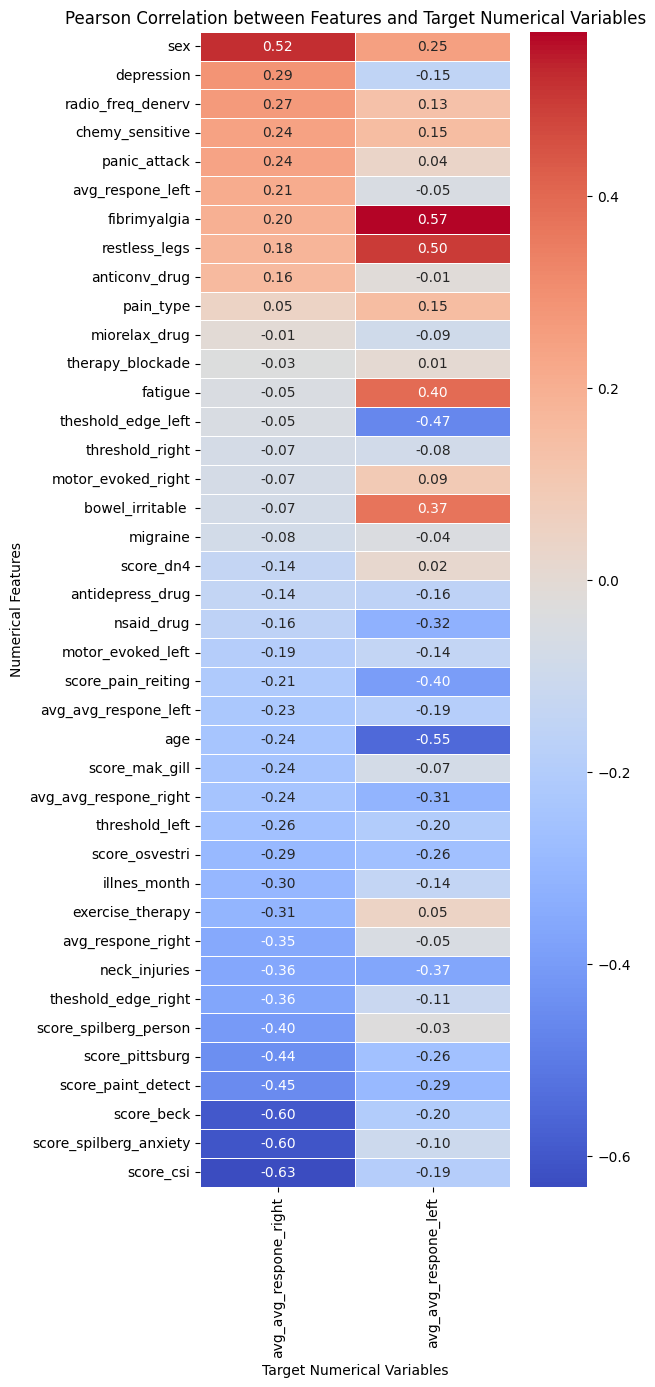

In [190]:
correlation_df = pd.DataFrame({
    'avg_avg_respone_right': correlations_right,
    'avg_avg_respone_left': correlations_left
})

plt.figure(figsize=(5, 15))
sns.heatmap(correlation_df.dropna().sort_values(by='avg_avg_respone_right', ascending=False), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation between Features and Target Numerical Variables')
plt.xlabel('Target Numerical Variables')
plt.ylabel('Numerical Features')
plt.show()

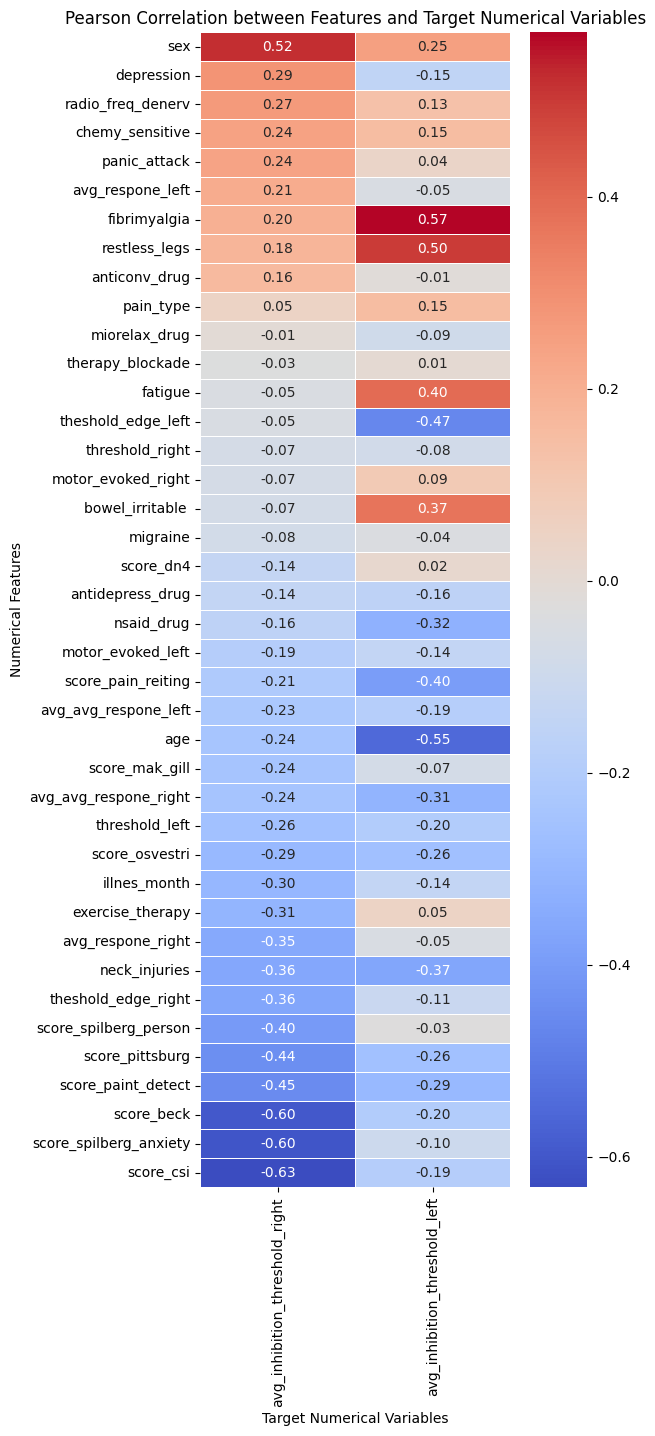

In [192]:
table_data_LPRM = table_data[table_data_LPRM_columns]
table_data_LPRM = table_data_LPRM.dropna()
#сбросим индекс DataFrame после удаления строк со значениями NaN
table_data_LPRM = table_data_LPRM.reset_index(drop=True)

# Convert relevant columns to numeric, handling comma decimal separators
for col in table_data_LPRM.columns:
    if col != 'patient_id': # Exclude 'patient_id' from conversion
        # Ensure the column is treated as string before replacement to avoid errors on mixed types
        table_data_LPRM[col] = table_data_LPRM[col].astype(str).str.replace(',', '.', regex=False)
        # Convert to numeric, coercing errors to NaN
        table_data_LPRM[col] = pd.to_numeric(table_data_LPRM[col], errors='coerce')

target_variables = ['avg_inhibition_threshold_right', 'avg_inhibition_threshold_left']

#table_data_LPRM = table_data_LPRM.drop(['inhibition_threshold_right','inhibition_threshold_left'], axis=1)
# Identify numerical columns for correlation, excluding 'patient_id' and target_variables themselves
numerical_features_for_corr = [col for col in table_data_LPRM.columns
                               if col not in ['patient_id'] + target_variables and pd.api.types.is_numeric_dtype(table_data_LPRM[col])
                               ]
correlations_right=[]
correlations_left=[]
correlations_right = pd.Series(dtype='float64')
correlations_left = pd.Series(dtype='float64')

for feature in numerical_features_for_corr:
    # Correlation with avg_avg_respone_right
    corr_right = table_data_LPRM[feature].corr(table_data_LPRM['avg_inhibition_threshold_right'])
    correlations_right[feature] = corr_right

    # Correlation with avg_avg_respone_left
    corr_left = table_data_LPRM[feature].corr(table_data_LPRM['avg_inhibition_threshold_left'])
    correlations_left[feature] = corr_left


correlation_df = pd.DataFrame({
    'avg_inhibition_threshold_right': correlations_right,
    'avg_inhibition_threshold_left': correlations_left
})

plt.figure(figsize=(5, 15))
sns.heatmap(correlation_df.dropna().sort_values(by='avg_inhibition_threshold_right', ascending=False), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation between Features and Target Numerical Variables')
plt.xlabel('Target Numerical Variables')
plt.ylabel('Numerical Features')
plt.show()

# Clustering for score and diagnosis

In [195]:
table_data.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_dn4',
       'score_paint_detect', 'score_beck', 'score_spilberg_person',
       'score_spilberg_anxiety', 'score_pittsburg', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'score_mak_gill', 'nsaid_drug',
       'miorelax_drug', 'antidepress_drug', 'anticonv_drug',
       'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade',
       'threshold_left', 'threshold_right', 'motor_evoked_right',
       'motor_evoked_left', 'avg_respone_right', 'avg_respone_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right', 'theshold_edge_left', 'avg_avg_respone_right',
       'avg_avg_respone_left', 'avg_interstimul_threshod',
       'avg_inhibition_threshold_right', 'avg_inhibition_th

In [197]:
table_data = table_data.drop('avg_interstimul_threshod', axis=1)

In [198]:
score_columns = [
       'patient_id','pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_dn4',
       'score_paint_detect', 'score_beck', 'score_spilberg_person',
       'score_spilberg_anxiety', 'score_pittsburg', 'score_csi', 'score_mak_gill'
]

In [202]:
table_data_score = table_data[score_columns]
df_clustering = table_data_score.drop('patient_id', axis=1).copy()

In [204]:
for col in df_clustering.columns:
    if df_clustering[col].isnull().any():
        df_clustering[col] = df_clustering[col].fillna(df_clustering[col].mean())

print("Missing values handled by mean imputation.")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)

#print("Data scaled using StandardScaler.")
#print(df_scaled.head())

Missing values handled by mean imputation.


Use techniques like the Elbow method or Silhouette score to find a suitable number of clusters for the chosen clustering algorithm.


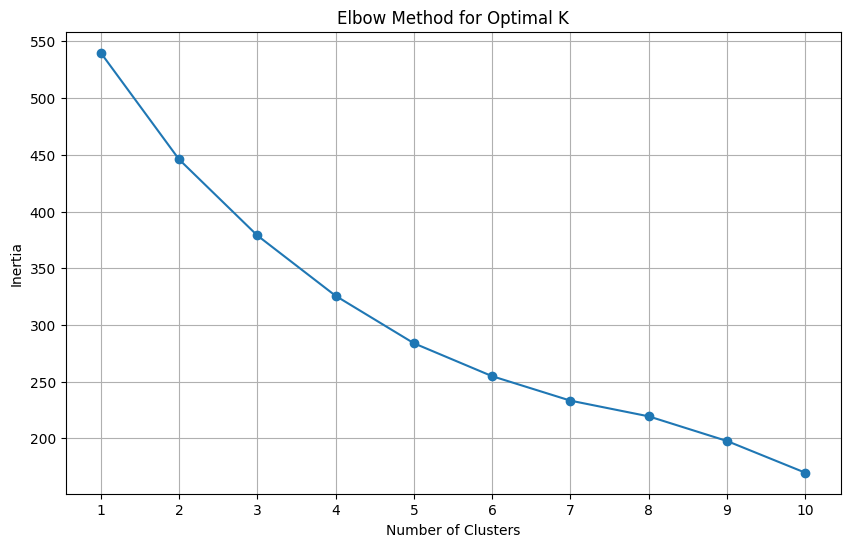

Elbow method plot generated.


In [205]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []

# Loop through a range of potential cluster numbers
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("Elbow method plot generated.")

Based on the Elbow method plot, the optimal number of clusters appears to be **3 or 4**, as this is where the rate of decrease in inertia significantly slows down, forming an 'elbow' shape. Beyond this point, adding more clusters does not significantly improve the model fit.



## Perform clustering
Apply a clustering algorithm (e.g., K-Means) to the prepared data to group patients.


In [207]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit the KMeans model to the scaled data
kmeans.fit(df_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original tabel_data DataFrame
table_data['cluster'] = cluster_labels

print(f"KMeans clustering performed with {n_clusters} clusters.")
print("First 5 rows of tabel_data with new 'cluster' column:")
print(table_data[['patient_id', 'cluster']].head())

KMeans clustering performed with 3 clusters.
First 5 rows of tabel_data with new 'cluster' column:
   patient_id  cluster
0  patient_ 1        0
1  patient_ 2        2
2  patient_ 3        2
3  patient_ 4        1
4  patient_ 5        0


The scatter plot displays the patient clusters in a 2D space, reduced using Principal Component Analysis (PCA). Each point represents a patient, colored according to their assigned cluster.

**Key Observations from the Visualization:**

*   **Cluster Separation:** The three clusters appear to have some degree of separation, indicating that the K-Means algorithm successfully grouped patients with similar characteristics based on their score and diagnosis features.
*   **Patient Distribution:** Within each cluster, individual patients are labeled with their `patient_id`, `pain_type`, and `illnes_month`. This allows for a granular inspection of the characteristics of patients belonging to specific clusters.
*   **Pain Type and Illness Month:** While a clear pattern is not immediately obvious for `pain_type` and `illnes_month` across all clusters from a high-level view, a closer look at specific clusters might reveal tendencies. For example, some clusters might contain a higher proportion of patients with a particular pain type or a narrower range of illness duration.

**Next Steps for Visualization:**

*   Further analysis could involve calculating the average characteristics of `pain_type` and `illnes_month` (and other original features) for each cluster to quantitatively describe what defines each group. This would provide deeper insights into the clinical relevance of each cluster.

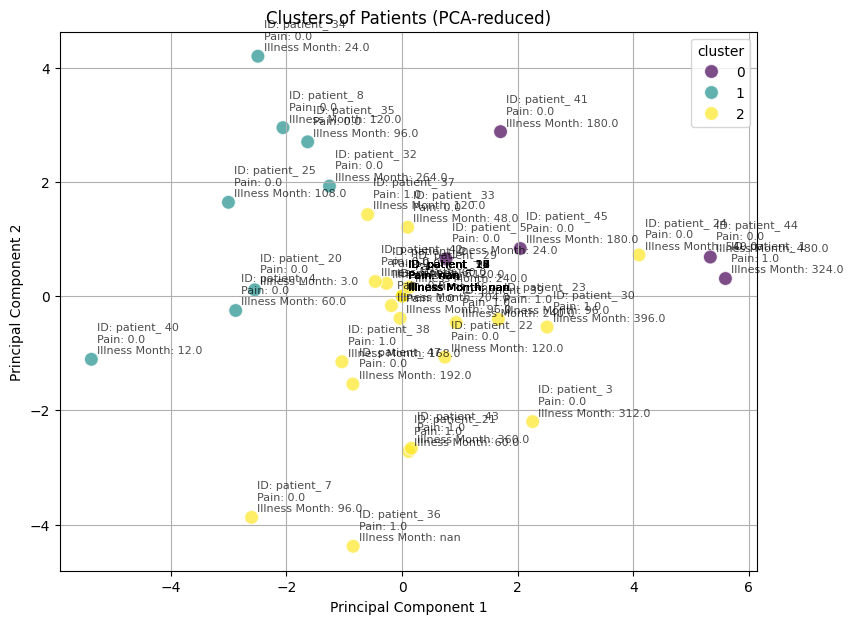

In [213]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Add cluster labels and relevant original features back for plotting
df_pca['cluster'] = table_data['cluster']
df_pca['patient_id'] = table_data['patient_id']
df_pca['pain_type'] = table_data['pain_type']
df_pca['illnes_month'] = table_data['illnes_month']

plt.figure(figsize=(9, 7))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='viridis',
    data=df_pca,
    legend='full',
    s=100,
    alpha=0.7
)

# Add labels for patient_id, pain_type, and illnes_month
for i, row in df_pca.iterrows():
    plt.text(row['PC1'] + 0.1, row['PC2'] + 0.1,
             f"ID: {row['patient_id']}\nPain: {row['pain_type']}\nIllness Month: {row['illnes_month']}",
             fontsize=8, alpha=0.7)

plt.title('Clusters of Patients (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## syndrom and diagnosis clustering

In [214]:
table_data.columns

Index(['patient_id', 'sex', 'age', 'pain_type', 'illnes_month',
       'score_pain_reiting', 'score_osvestri', 'score_dn4',
       'score_paint_detect', 'score_beck', 'score_spilberg_person',
       'score_spilberg_anxiety', 'score_pittsburg', 'score_csi',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression', 'score_mak_gill', 'nsaid_drug',
       'miorelax_drug', 'antidepress_drug', 'anticonv_drug',
       'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade',
       'threshold_left', 'threshold_right', 'motor_evoked_right',
       'motor_evoked_left', 'avg_respone_right', 'avg_respone_left',
       'inhibition_threshold_right', 'inhibition_threshold_left',
       'theshold_edge_right', 'theshold_edge_left', 'avg_avg_respone_right',
       'avg_avg_respone_left', 'avg_inhibition_threshold_right',
       'avg_inhibition_threshold_left', 'cluster'],
 

In [215]:
diagnosis_columns = ['patient_id', 'cluster',
       'restless_legs', 'fatigue', 'fibrimyalgia', 'tmdibular_pathology',
       'migraine', 'bowel_irritable ', 'chemy_sensitive', 'neck_injuries',
       'panic_attack', 'depression','nsaid_drug',
       'miorelax_drug', 'antidepress_drug', 'anticonv_drug',
       'radio_freq_denerv', 'exercise_therapy', 'therapy_blockade'
]

In [216]:
table_data_diagnosis = table_data[diagnosis_columns]

In [218]:
# Identify numerical and categorical columns, excluding 'patient_id' and 'cluster'
all_columns = table_data_diagnosis.columns.tolist()
columns_to_exclude = ['patient_id', 'cluster']

features_for_profiling = [col for col in all_columns if col not in columns_to_exclude]

numerical_features = table_data[features_for_profiling].select_dtypes(include=np.number).columns.tolist()
categorical_features = table_data[features_for_profiling].select_dtypes(include='object').columns.tolist()

# Handle the special case of 'sex' if it's considered categorical but is numeric (0/1)
# We'll treat 0/1 columns as categorical if they are not already in categorical_features list
for col in numerical_features:
    unique_vals = table_data[col].dropna().unique()
    if len(unique_vals) <= 5 and all(val in [0, 1] for val in unique_vals):
        categorical_features.append(col)
        numerical_features.remove(col)


# Group by cluster and calculate mean for numerical features
numerical_cluster_profile = table_data.groupby('cluster')[numerical_features].mean()
#print("\nNumerical Feature Profile per Cluster (Mean):")
#print(numerical_cluster_profile)

# For categorical features, count occurrences within each cluster
#print("\nCategorical Feature Profile per Cluster (Value Counts/Proportions):")
for col in categorical_features:
#    print(f"\n--- {col} ---")
    counts = table_data.groupby('cluster')[col].value_counts(normalize=True).unstack(fill_value=0)
#    print(counts)


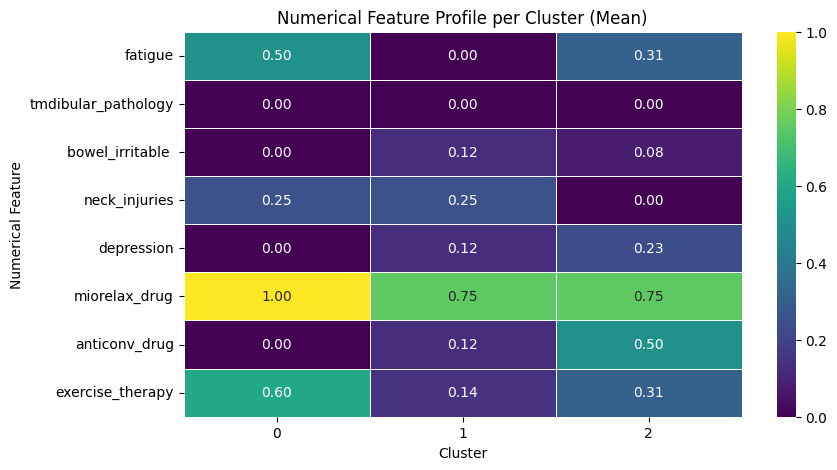

In [219]:
plt.figure(figsize=(9, 5))
sns.heatmap(numerical_cluster_profile.T, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Numerical Feature Profile per Cluster (Mean)')
plt.xlabel('Cluster')
plt.ylabel('Numerical Feature')
plt.show()

### Visualize Clusters with a Dendrogram
Dendrogram method calculates the average distance between all pairs of observations in two clusters before merging them. This can sometimes produce more balanced dendrograms and offer a different perspective on cluster formation compared to the 'ward' method, which minimizes the variance within each cluster.


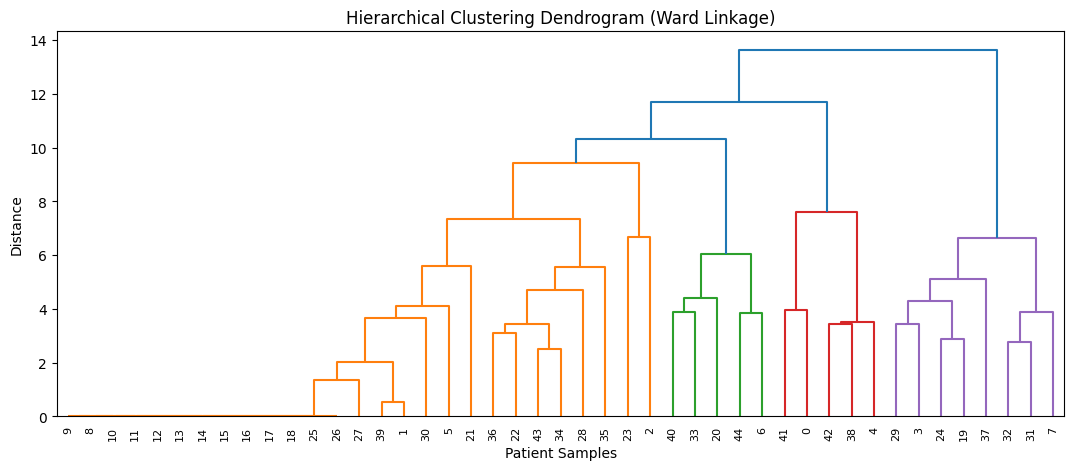

Dendrogram with 'average' linkage generated.


In [223]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using 'average' method
linked_average = linkage(df_scaled, method='ward')

plt.figure(figsize=(13, 5))
dendrogram(linked_average,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Patient Samples')
plt.ylabel('Distance')
plt.show()

print("Dendrogram with 'average' linkage generated.")

## Dendrogram clustering

In [228]:
df_clustering_pca = table_data.copy()
df_clustering_pca = df_clustering_pca.drop(['patient_id', 'cluster'], axis=1)

for col in df_clustering_pca.columns:
    if df_clustering_pca[col].isnull().any():
        df_clustering_pca[col] = df_clustering_pca[col].fillna(df_clustering_pca[col].mean())

print("df_clustering_pca DataFrame prepared: 'patient_id' and 'cluster' columns dropped, missing values imputed with mean.")
print(df_clustering_pca.head())

df_clustering_pca DataFrame prepared: 'patient_id' and 'cluster' columns dropped, missing values imputed with mean.
   sex  age  pain_type  illnes_month  score_pain_reiting  score_osvestri  \
0    0   72        1.0         324.0            9.000000       58.000000   
1    1   60        0.0         120.0            6.071429       36.071429   
2    0   54        0.0         312.0            7.000000       38.000000   
3    0   25        0.0          60.0            5.000000       22.000000   
4    0   42        0.0          24.0            8.000000       48.000000   

   score_dn4  score_paint_detect  score_beck  score_spilberg_person  ...  \
0   5.000000           24.000000   24.000000                  64.00  ...   
1   3.230769           12.178571   13.153846                  47.75  ...   
2   7.000000           24.000000    9.000000                  45.00  ...   
3   2.000000            7.000000    8.000000                  43.00  ...   
4   3.000000            7.000000   22.000000   

Use `StandardScaler` to normalize range and Principal Component Analysis (PCA) to reduce the dimensionality of the scaled data, retaining components that cumulatively explain at least 95% of the total variance, to simplify the dataset while preserving most of its information for clustering.



In [229]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
df_scaled_pca = pd.DataFrame(scaler.fit_transform(df_clustering_pca), columns=df_clustering_pca.columns)
print("Data scaled using StandardScaler.")

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95) # Retain components that explain 95% of the variance
df_pca_reduced = pca.fit_transform(df_scaled_pca)

# Convert to DataFrame for easier inspection, if needed
df_pca_reduced = pd.DataFrame(df_pca_reduced)

print(f"Original number of features: {df_scaled_pca.shape[1]}")
print(f"Reduced number of features after PCA (95% variance retained): {df_pca_reduced.shape[1]}")
print("PCA dimensionality reduction complete. Reduced data head:")
#print(df_pca_reduced.head())

Data scaled using StandardScaler.
Original number of features: 45
Reduced number of features after PCA (95% variance retained): 23
PCA dimensionality reduction complete. Reduced data head:


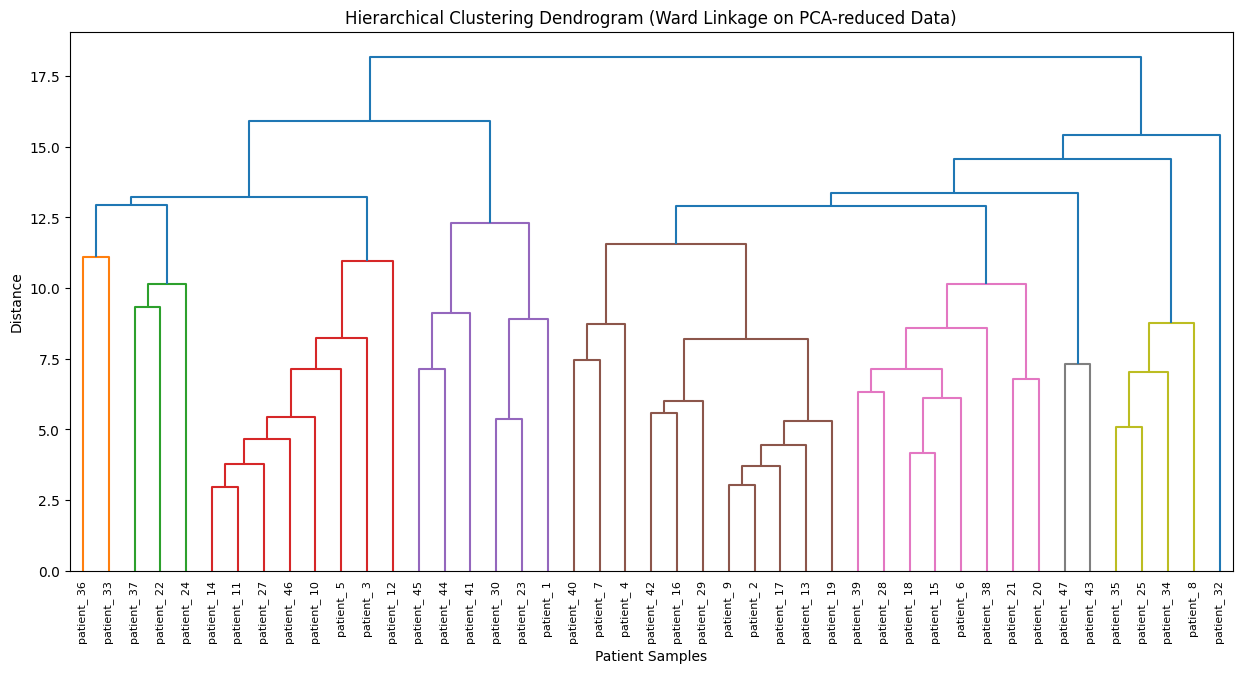

Dendrogram with 'ward' linkage on PCA-reduced data generated.


In [230]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Get patient_ids for labeling the dendrogram
patient_ids_for_dendrogram = table_data['patient_id'].tolist()

# Generate the linkage matrix using 'ward' method on the PCA-reduced data
linked_ward_pca = linkage(df_pca_reduced, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked_ward_pca,
           orientation='top',
           labels=patient_ids_for_dendrogram,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage on PCA-reduced Data)')
plt.xlabel('Patient Samples')
plt.ylabel('Distance')
plt.show()

print("Dendrogram with 'ward' linkage on PCA-reduced data generated.")